In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections

import hubbard as hb

%matplotlib widget

In [58]:
tex_fonts = {
    "pgf.texsystem": "pdflatex",
    'pgf.rcfonts': False,
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [95]:
N = M = 100

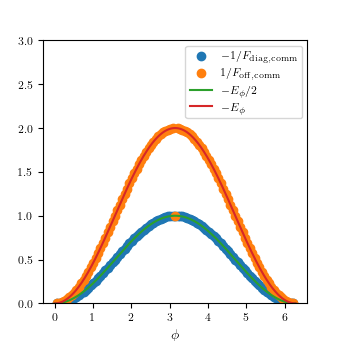

In [100]:
p = np.arange(M-1)+1
p_cont = np.linspace(0, M, 1000)

def params_calc(M, phi):
    j = np.arange(M)+1
    p_j = lambda q: np.sqrt(2/M) * np.cos(np.pi / M * q * (j-.5))
    a_j = lambda phi, phi_0: 1/np.sqrt(M) * np.exp(1j* (phi * j + phi_0))
    q = np.arange(M-1)+1
    Eq = np.cos(np.pi/M*q)-1
    E_gap_min = abs(np.cos(np.pi / M) - 1) 
    Omega = E_gap_min / 10
    A = np.empty(len(phi), dtype = np.complex64)
    fqp = np.empty((len(q), len(phi)), dtype = np.complex64)
    for i, q_i in enumerate(q):
        for k, phi_k in enumerate(phi):
            #phi_0 = 0
            phi_0 = -(M+1)/2 * phi_k
            #phi_0 = - 1/2 * phi_k
            fqp[i, k] = sum(p_j(q_i)*a_j(phi_k, phi_0))
            A[k] = sum(a_j(phi_k, phi_0))

    F_diag = abs(fqp)**2
    F_diag = [sum(F_diag[:,i] / Eq) for i in range(len(phi))]
    F_diag = np.array(F_diag)

    F_off = np.conj(fqp)**2
    F_off_2 = fqp**2

    #print(F_off.real == F_off_2.real)

    F_off = [sum(F_off[:,i] / Eq) for i in range(len(phi))]
    F_off = np.array(F_off)

    #print('Max Im[F_off]:', abs(F_off.imag).max())
    #print('Min Im[F_off]:', abs(F_off.imag).min())

    #chi_z = Omega **2 * 2/(M-1) * F_diag
    #chi_x = Omega **2 * 2/(M-1) * np.real(F_off)
    #chi_xy = Omega **2 * 2/(M-1) * np.imag(F_off)
    chi_z = Omega **2 / 2/(M-1) * F_diag
    chi_x = Omega **2 / 2/(M-1) * np.real(F_off)
    chi_xy = Omega **2 / 2/(M-1) * np.imag(F_off)

    A = A/M

    v_x = A.real * Omega / 2
    v_y = A.imag * Omega / 2
    
    return chi_z, chi_x, chi_xy, v_x, v_y, F_diag, F_off


phi = 2 * np.pi / M * p_cont
chi_z, chi_x, chi_xy, v_x, v_y, F_diag, F_off = params_calc(M, phi)
    

fig = plt.figure(1)
fig.clf()

#plt.plot(phi, chi_z)
#plt.plot(phi, chi_x)
#plt.plot(phi, chi_xy)#, 'o-')
#plt.plot(phi, v_x, color = 'blue')
#plt.plot(phi, v_y, color = 'red')

if N <= 10:
    plt.plot(phi, -1/F_diag, label = '$-1/F_\mathrm{diag}$')
    plt.plot(phi, 1/F_off.real, label = '$1/F_\mathrm{off}$')

x = 2*np.pi/M*(np.arange(M)+.5)

_, _, _, _, _, F_diag_inc, _ = params_calc(M, x)


#plt.scatter(x, -1/F_diag_inc)

y = 2*np.pi/M*(np.arange(M-1)+1)

_, _, _, _, _, F_diag_comm, F_off_comm = params_calc(M, y)

plt.scatter(y, -1/F_diag_comm, label = '$-1/F_\mathrm{diag, comm}$')
plt.scatter(y, 1/F_off_comm.real, label = '$1/F_\mathrm{off, comm}$')

plt.plot(phi, np.sin(phi/2)**2, color = 'tab:green', label = '$-E_\phi / 2$')
plt.plot(phi, 2*np.sin(phi/2)**2, color = 'tab:red', label = '$-E_\phi$')

#plt.plot(phi, 1.55*np.sin(phi/2)**2)
#plt.axhline(0, ls = 'dashed', color = 'black')

plt.ylim(0,3)
#plt.ylim(0,.025)
#plt.ylim(-.011,-.009)
#plt.ylim(-.2,.2)
#plt.xlim(np.pi-1.5, np.pi+1.5)
plt.xlabel(r'$\phi $')#[\frac{2\pi}{M} p]$')

colwidth = 3.416666
fig.set_size_inches(w = colwidth, h = 1*colwidth)

plt.legend()

plt.savefig(f'output/F_to_E_gap_N{N}.pdf', format='pdf', bbox_inches='tight')

plt.show()

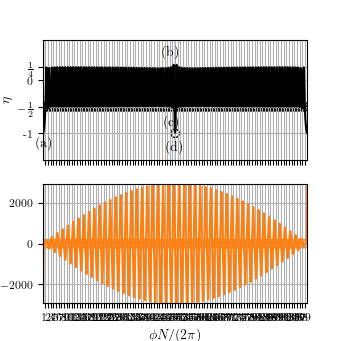

In [97]:
phi = 2 * np.pi / M * p_cont
chi_z, chi_x, chi_xy, v_x, v_y, F_diag, F_off = params_calc(M, phi)

eta = chi_x/chi_z
gamma = v_x/chi_z

T = 2 * np.pi / M

gamma_lim = np.max(gamma[ (2*np.pi/M < phi) & (phi < 2*np.pi*(1-1/M)) ])

#ylim = (-1.5, .75), (-30, 30)
ylim = (-1.5, .75), (-gamma_lim, gamma_lim)
#ylim = (-1.5, 1.75), (-20, 20)

figwidth = 3.416666#*2
fig, (ax1, ax2) = plt.subplots(2, sharex = True)
fig.set_size_inches(w=figwidth, h=figwidth)

ax1.grid()
ax2.grid()

#def region_shade(region, ymin, ymax, color):
def region_shade(region):
    if eta[region].mean() > 0:
        color = 'tab:red'
    else:
        color = 'tab:blue'
    col1 = collections.BrokenBarHCollection.span_where(
        #phi, ymin=ymin, ymax=ymax, where = region, facecolor=color, alpha=0.5)
        phi, ymin=-2, ymax=2, where = region, facecolor=color, alpha=0.2)
    ax1.add_collection(col1)
    col2 = collections.BrokenBarHCollection.span_where(
        phi, ymin=-gamma_lim, ymax=gamma_lim, where = region, facecolor=color, alpha=0.2)
    ax2.add_collection(col2)
    
    return col1, col2

def region_label(region, label, f = 1/15):
    if eta[region].mean() > 0:
        s = 1
    else:
        s = -1
    x = phi[region].mean()
    
    y = eta[region].max() if eta[region].mean() > 0 else eta[region].min()
    dy = ylim[0][1] - ylim[0][0]
    ax1.text(x, y + y/abs(y)*f*dy, f'({label})',
        verticalalignment='center', horizontalalignment='center')
    
    '''
    y = gamma[region].max() if gamma[region].mean() > 0 else gamma[region].min()
    dy = ylim[1][1] - ylim[1][0]
    ax2.text(x, y + y/abs(y)*f*dy, f'({label})',
        verticalalignment='center', horizontalalignment='center')
    '''
    
    
ax1.plot(phi, eta, color = 'k', label = '$\eta$')
#ax2.plot(phi, gamma, color = 'tab:orange', ls = 'dashed', label = '$\gamma$')
ax2.plot(phi, gamma, color = 'tab:orange', label = '$\gamma$')

region_1 = (eta < 0) & (.5 < phi/T) & (phi/T < 1)
region_2 = (eta > 0) & (M//2 - 2 < phi/T) & (phi/T < M//2 -1)
region_3 = (eta < 0) & (M//2 - 1.5 < phi/T) & (phi/T < M//2 - .5)
region_4 = (eta < 0) & (M//2 - .5 < phi/T) & (phi/T < M//2 + .5) 

regions = region_1, region_2, region_3, region_4
labels = 'abcd'

#region_shade(region_1, -3, 0, 'tab:blue')
#region_shade(region_2, -3, 0, 'tab:orange')
#region_shade(region_3,  0, 3, 'tab:green')
#region_shade(region_4, -3, 0, 'tab:red')
for region, label in zip(regions, labels):
    region_shade(region)
    region_label(region, label, f = 1/8)

phi = 2 * np.pi / M * p
chi_z, chi_x, chi_xy, v_x, v_y, F_diag, F_off = params_calc(M, phi)

eta = chi_x/chi_z
gamma = v_x/chi_z

ax1.scatter(phi, eta, marker = 'o', facecolor = 'none', color='k')
ax2.scatter(phi, gamma, marker = 'o', facecolor = 'none', color='tab:orange')


phi = phi + np.pi/M
phi = phi[:-1]
phi =  np.pi/M * (2*(np.arange(M)+1)-1)
chi_z, chi_x, chi_xy, v_x, v_y, F_diag, F_off = params_calc(M, phi)

eta = chi_x/chi_z
gamma = v_x/chi_z

#ax1.scatter(phi, eta, marker = 'x', color='black')
#ax2.scatter(phi, gamma, marker = 'x', color='black')


#plt.xticks(phi, [fr'$\frac{{{m}}}{{{M}}}$' for m in p])
ax2.set_xticks(2 * np.pi / M * p, [m for m in p])
#ax1.set_yticks([1,-.5, 0,.25], ('1', r'$-\frac{1}{2}$', '0', r'$\frac{1}{4}$'))
ax1.set_yticks([-1,-.5, 0,.25], ('-1', r'$-\frac{1}{2}$', '0', r'$\frac{1}{4}$'))
#plt.yticks([-1,-.5, 0], ('-1', r'$-\frac{1}{2}$', '0'))

ax2.set_xlim(0,2*np.pi)
ax1.set_ylim(ylim[0])
ax2.set_ylim(ylim[1])

ax1.set_ylabel(r'$\eta$')
ax2.set_ylabel(r'$\gamma$')
#ax2.set_xlabel(r'$\phi \left[\frac{2\pi}{N}\right]$')
ax2.set_xlabel(r'$\phi N / (2\pi)$')

title = f'eta_gamma_N{N}'
#fig.savefig(f'{title}.pgf', backend = 'pgf' )
fig.savefig(f'output/{title}.pdf', format='pdf', bbox_inches='tight')
#fig.savefig(f'{title}.png')

(-10.0, 10.0)

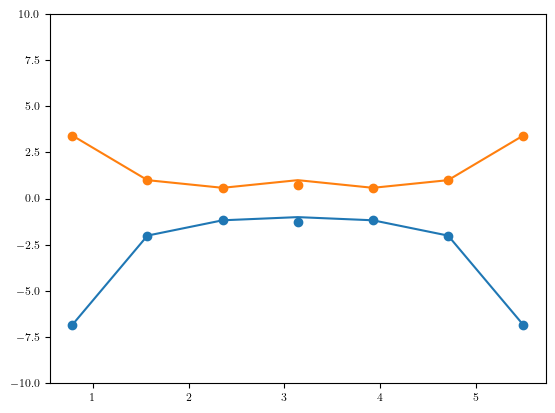

In [8]:
F_dia_a = []
F_off_a = []

phi = 2*np.pi*p/M
q = np.arange(M-1)+1

chi_z, chi_x, chi_xy, v_x, v_y, F_diag, F_off = params_calc(M, phi)

for m in p:
    E2m = -2*np.sin(np.pi/M*m)**2
    xq = np.sin(np.pi/M*q/2)/np.sin(np.pi/M*m) 
    xq = xq[::2]
    F_2m = 1/E2m
    F_odd_1 = 1/N**2*(4/E2m**2)*sum(1 /xq**2 /(xq+1)**2/(xq-1)**2)
    F_odd_2 = 1/N**2*(2/E2m)   *sum( 1/(xq+1)**2/(xq-1)**2)
    
    F_odd = F_odd_1 + F_odd_2
    F_odd *= 1
    F_2m  *= .5
    #print(-F_odd/F_2m)
    #print(F_2m, F_odd)

    F_off_a.append(F_2m + F_odd)
    F_dia_a.append(F_2m - F_odd) 


plt.plot(phi, F_diag)
plt.plot(phi, F_off.real)
#plt.plot(phi, -F_diag-F_off, '^-')
plt.scatter(phi, F_dia_a)
plt.scatter(phi, F_off_a)

plt.ylim(-10,10)

In [9]:
F_dia_a = np.array(F_dia_a)
F_off_a = np.array(F_off_a)

eta = (-(F_dia_a - F_off_a) - 2*F_off_a )/ (2*F_off_a)
eta = -.5 * (F_dia_a/F_off_a + 1) 
eta

array([0.5       , 0.5       , 0.5       , 0.33333333, 0.5       ,
       0.5       , 0.5       ])

In [10]:
np.real( (-(F_diag - F_off) - 2*F_off )/ (2*F_off) )

print(F_diag/F_off)

[-1.99999997-3.64471108e-16j -1.99999993-6.13544539e-17j
 -1.99999994+4.51032412e-15j -1.        -2.27392367e-31j
 -1.99999994-6.71613708e-15j -1.99999993-3.36116667e-15j
 -1.99999997+6.49457307e-15j]


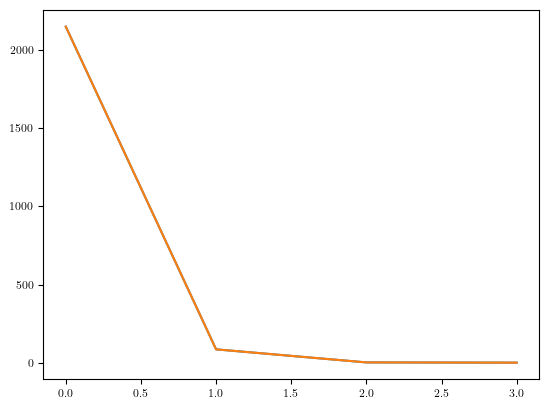

In [11]:
A = []
for m in p[::6]:
    x = np.sin(np.pi/M*q/2)
    y = np.sin(np.pi/M*m) 
    x = x[::2] 
    res = (1-x) * (1+x) / (x-y)**2 / (x+y)**2 / x**2
    #res = 1 / (x-y) / (x+y)
    #res = (1-x) * (1+x) / x**2
    plt.plot(res)
    res = 2*y**4 * sum(res)
    res *= 2/3/N**2
    

    A.append(res)
#plt.plot(A)

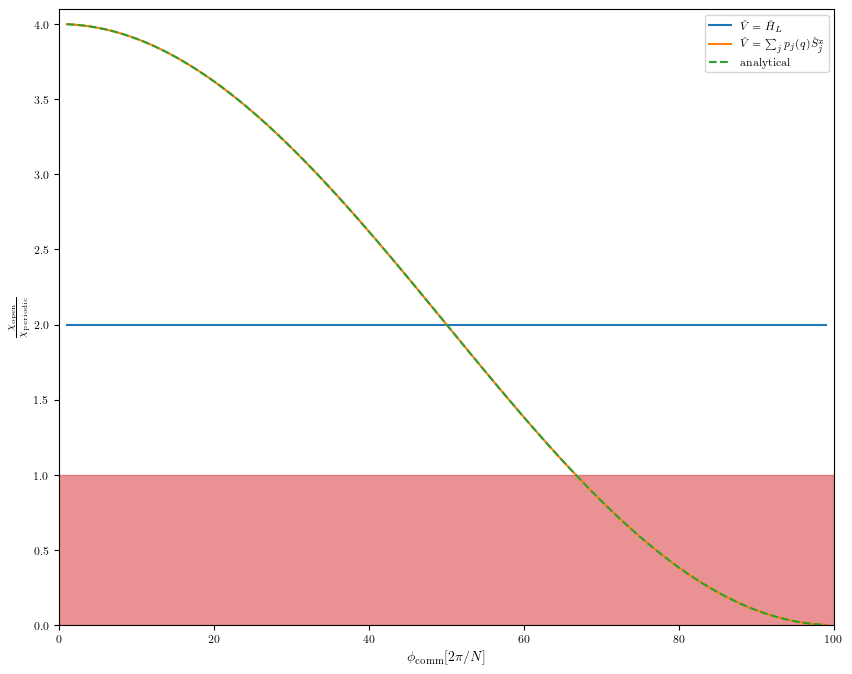

In [12]:
M = 100

E_gap_min = abs(np.cos(np.pi / M) - 1) 
Omega = E_gap_min/ 10

q = np.arange(M-1)+1

chi_0 = Omega**2/(M-1)/(1-np.cos(2*np.pi/M*q))/2
chi_z_pure = Omega**2/(M-1)/(1-np.cos(np.pi/M*q))/2

phi = 2 * np.pi / M * q
chi_z, chi_x, chi_xy, v_x, v_y, F_diag, F_off = params_calc(M, phi)
    
fig = plt.figure()

fig.set_size_inches(10, 8)

plt.plot(q, -chi_z/chi_0, label = '$\hat{V} = \hat{H}_L$')
#plt.plot(phi, chi_x/chi_z)
#plt.plot(phi, chi_x/chi_0)
plt.plot(q, chi_z_pure/chi_0, label = '$\hat{V} = \sum_j p_j(q) \hat{S}_j^x$')

plt.plot(q, 4*np.cos(np.pi/M*q/2)**2, ls = 'dashed', label = 'analytical')

#plt.axhline(1, color = 'tab:red')
plt.fill_between(np.arange(M+2)-1, np.ones(M+2), color ='tab:red', alpha = .5)

plt.xlabel('$\phi_\mathrm{comm} [2\pi/N] $')
plt.ylabel(r'$\frac{\chi_\mathrm{open}}{\chi_\mathrm{periodic}}$')
plt.xlim(0, M)
plt.ylim(0, 4.1)
plt.legend()

Text(0, 0.5, '$\\frac{\\Delta E_\\mathrm{open}}{\\Delta E_\\mathrm{periodic}}$')

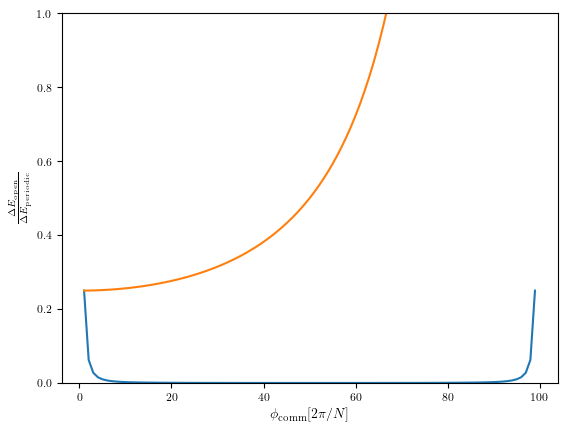

In [11]:
delta_open = (1-np.cos(np.pi/M))*np.ones(M-1)
delta_open_soft = 1-np.cos(np.pi/M*q)
delta_periodic = 1 - np.cos(2*np.pi/M*q)

plt.figure()

plt.plot(q, delta_open/delta_periodic)
plt.plot(q, delta_open_soft/delta_periodic)

plt.ylim(0,1)


plt.xlabel('$\phi_\mathrm{comm} [2\pi/N] $')
plt.ylabel(r'$\frac{\Delta E_\mathrm{open}}{\Delta E_\mathrm{periodic}}$')

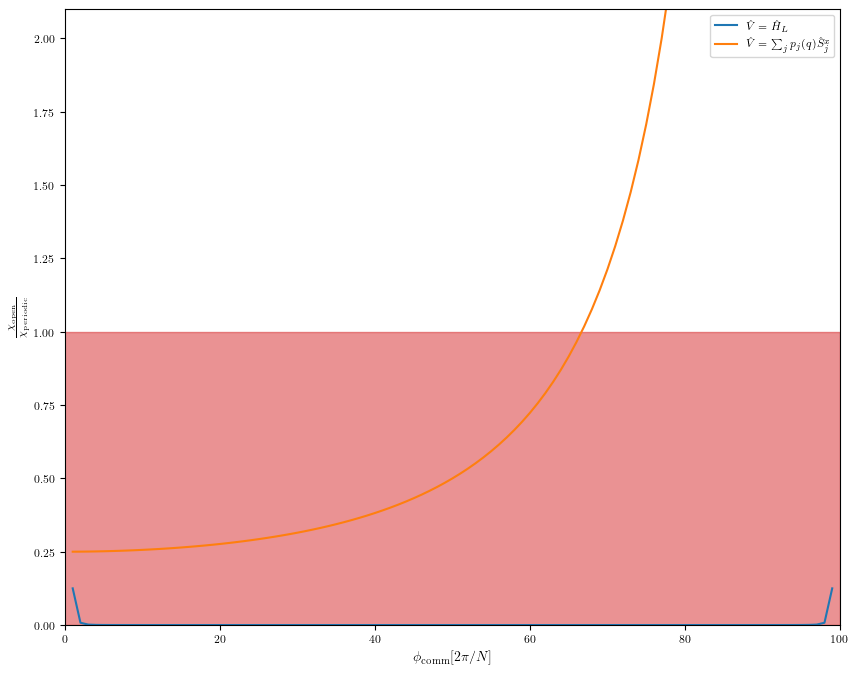

In [13]:
M = 100

# Now, assume Omega for each case is different and corresponds to dE/10

E_gap_min = abs(np.cos(np.pi / M) - 1) 

q = np.arange(M-1)+1

chi_0 = (1/10)**2/(M-1)*(1-np.cos(2*np.pi/M*q))/2
chi_z_pure = (1/10)**2/(M-1)*(1-np.cos(np.pi/M*q))/2

phi = 2 * np.pi / M * q
chi_z, chi_x, chi_xy, v_x, v_y, F_diag, F_off = params_calc(M, phi)
    
fig = plt.figure()

fig.set_size_inches(10, 8)

plt.plot(q, -chi_z/chi_0, label = '$\hat{V} = \hat{H}_L$')
#plt.plot(phi, chi_x/chi_z)
#plt.plot(phi, chi_x/chi_0)
plt.plot(q, chi_z_pure/chi_0, label = '$\hat{V} = \sum_j p_j(q) \hat{S}_j^x$')

#plt.plot(q, 4*np.cos(np.pi/M*q/2)**2, label = 'analytical')

#plt.axhline(1, color = 'tab:red')
plt.fill_between(np.arange(M+2)-1, np.ones(M+2), color ='tab:red', alpha = .5)

plt.xlabel('$\phi_\mathrm{comm} [2\pi/N] $')
plt.ylabel(r'$\frac{\chi_\mathrm{open}}{\chi_\mathrm{periodic}}$')
plt.xlim(0, M)
plt.ylim(0, 2.1)
plt.legend()